In [4]:
# 유방암 데이터셋 - 의사결정나무
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,  # 계층 샘플링할 데이터
                                                    random_state = 42)
# tree 계열 알고리즘은 랜덤으로 질문지를 만드는 것이 아니긴 함 (지니 계수라는 것을 이용)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
# 지니계수 : 질문지에서 물어볼 수 있는 부등호의 양
# 수치를 조절할 수 있는 역할

In [12]:
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [13]:
# 훈련 세트 정확도가 1이 나오면 데이터가 굉장히 깔끔하다
# 과대적합인지 보려면 테스트 세트 정확도를 해봄

# 모든 트리 알고리즘의 기본은 과대적합이 기본임.

### 복잡도를 낮추기 위해 나무의 최대 깊이 제한하기
- Scikit-learn 은 사전 가지치기 기법을 사용

In [14]:
# 범용적으로 max_depth(나무의 최대 깊이) 를 사용하면 좋다.
# max_depth를 사용하지 않으면
# 모든 node를 순수 node로 만들기 때문에
# 과대적합이 나올수밖에 없다.
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [15]:
# 아까보다 테스트 세트에 대한 정확도 증가

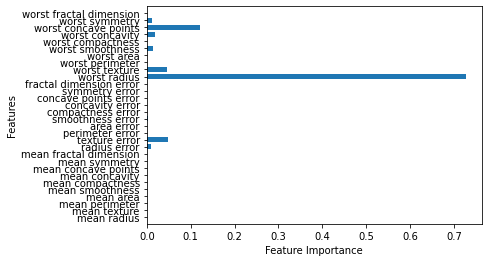

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # feature_importances_ : 특성 중요도
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances_cancer(tree)

In [20]:
# 특성 중요도?
# 선택 안 된 건 단지 decisiontree가 선택안한거일뿐 알 수 없음
# 0번 클래스에 중요한건지.. 1번 클래스에 중요한건지..
# 뭐를 분류할 때 중요한거라고 생각한 특성 중요도인지 알 수 없음
# 양수.

`feature_importance_`의 값이 낮다고 해서 중요하지 않은 건 아니다!

단순히 모델이 선택을 안 했을 수도 있기 때문에

In [21]:
# 특성 중요도가 제일 높은 변수 1개만 가지고 분석을 하게 되면
# 오히려 정확도가 떨어질 수도 있음
# 이게 바로 결정나무의 특징

### 랜덤 포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25,  # 데이터를 흩뜨려트리는 정도
                  random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 나무
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [25]:
# 랜덤 포레스트니까 
# 안쪽의 나무들 확인
# 시각화

In [26]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5356d1d7e9f7d6f704207e6f564908c0ca3fa3c5405d4ba13d939fa054c71f9b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


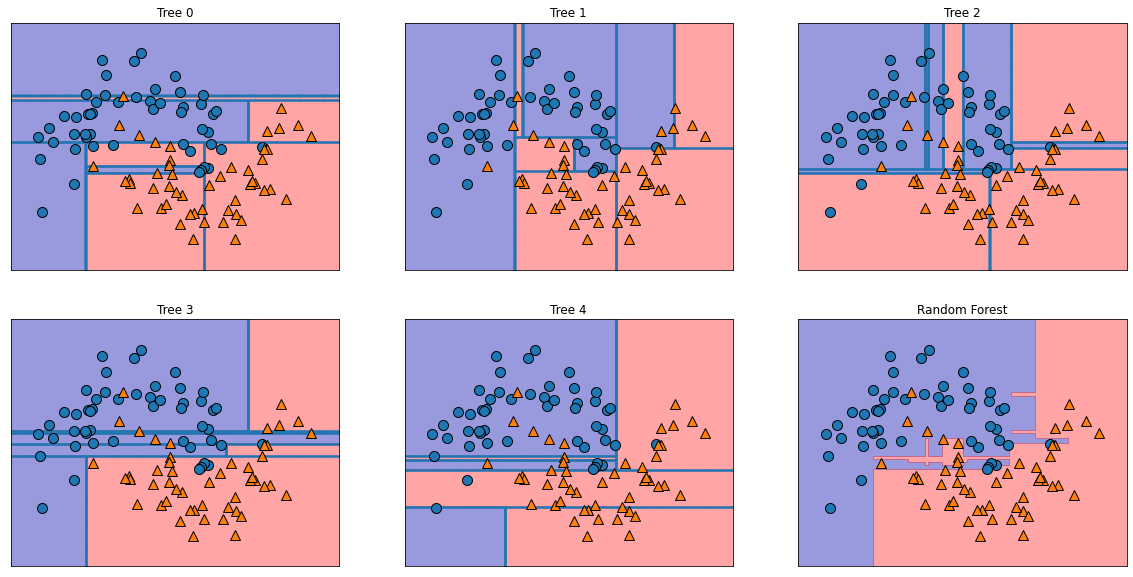

In [28]:
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [29]:
# 각각의 나무들 전부 다 최선을 다해 과적합
# 각각의 나무들이 다른 방향으로 과적합
# 맨 마지막 랜덤포레스트 : 5개의 나무들의 평균을 냄
# 왼쪽 - 파랑색 영향이 더 크다.
# 오른쪽 - 빨강색 영향이 더 크다.

# 각각의 데이터들을 취합해서 하나의 정보를 만들어냄
# 앙상블의 특징임

### 유방암 데이터셋 사용하기

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [32]:
# 테스트 데이터셋에 대해서도 정확도가 높음
# 데이터 튜닝을 하지 않아도 랜덤 포레스트는 성능이 좋다

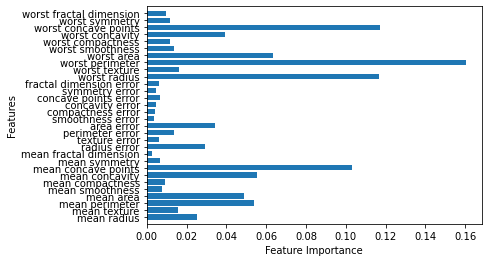

In [33]:
plot_feature_importances_cancer(forest)

In [34]:
# decision tree로 활용할 때보다
# 랜덤 포레스트가 훨씬 더 많은 특성들을 활용하고 있다.
# 더 다양한 시각으로 보고있다.

# decision tree는 worst radius를 제일 중요하게 생각했는데
# 랜덤 포레스트에선 worst perimeter를 제일 중요시

# 랜덤 포레스트 활용은 예측을 위해서뿐만 아니라
# 이 특성 중요치를 보기 위해서도 활용
# 보고서에도 많이 활용됨

# 사람이 시각화, 분석을 통해서 못보는 것들도 머신러닝을 통해서 볼 수 있다.
# 데이터 마이닝 : 데이터 안쪽에서 또 다른 데이터 획득

### 랜덤포레스트 장,단점
- 장점
  - 데이터에 신경 안 써도 된다.
  - 데이터의 크기, 특성 고려 안해도됨
- 단점
  - 트리를 많이 만들어야 하기때문에 자원 많이 사용하고 느리다.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [36]:
# 나쁘진 않음
# 과소적합된 약한 학습기를 여러개 연결한 것에도 불구하고 훈련 데스트셋에 대해 100%
# 과대적합되었을 가능성 크다.

# 그러면?
# 학습기를 더 약하게 만든다.

In [38]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [39]:
# 테스트셋에 대한 성능 나아짐
# max_depth를 줄이는 방법 사용

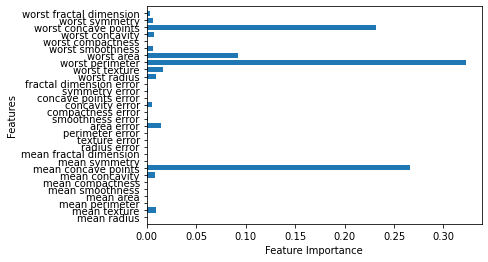

In [40]:
plot_feature_importances_cancer(gbrt)

In [41]:
# 중요도를 0으로 만드는 경우가 생김

# 그라디언트 부스팅 : 중요한 특성을 더 강조하고 싶을 때 사용